Here we are going to take a look at an example to see what are some processing that will be done in a real data pipline.

Here's a log file that extracted from a CNC machine:

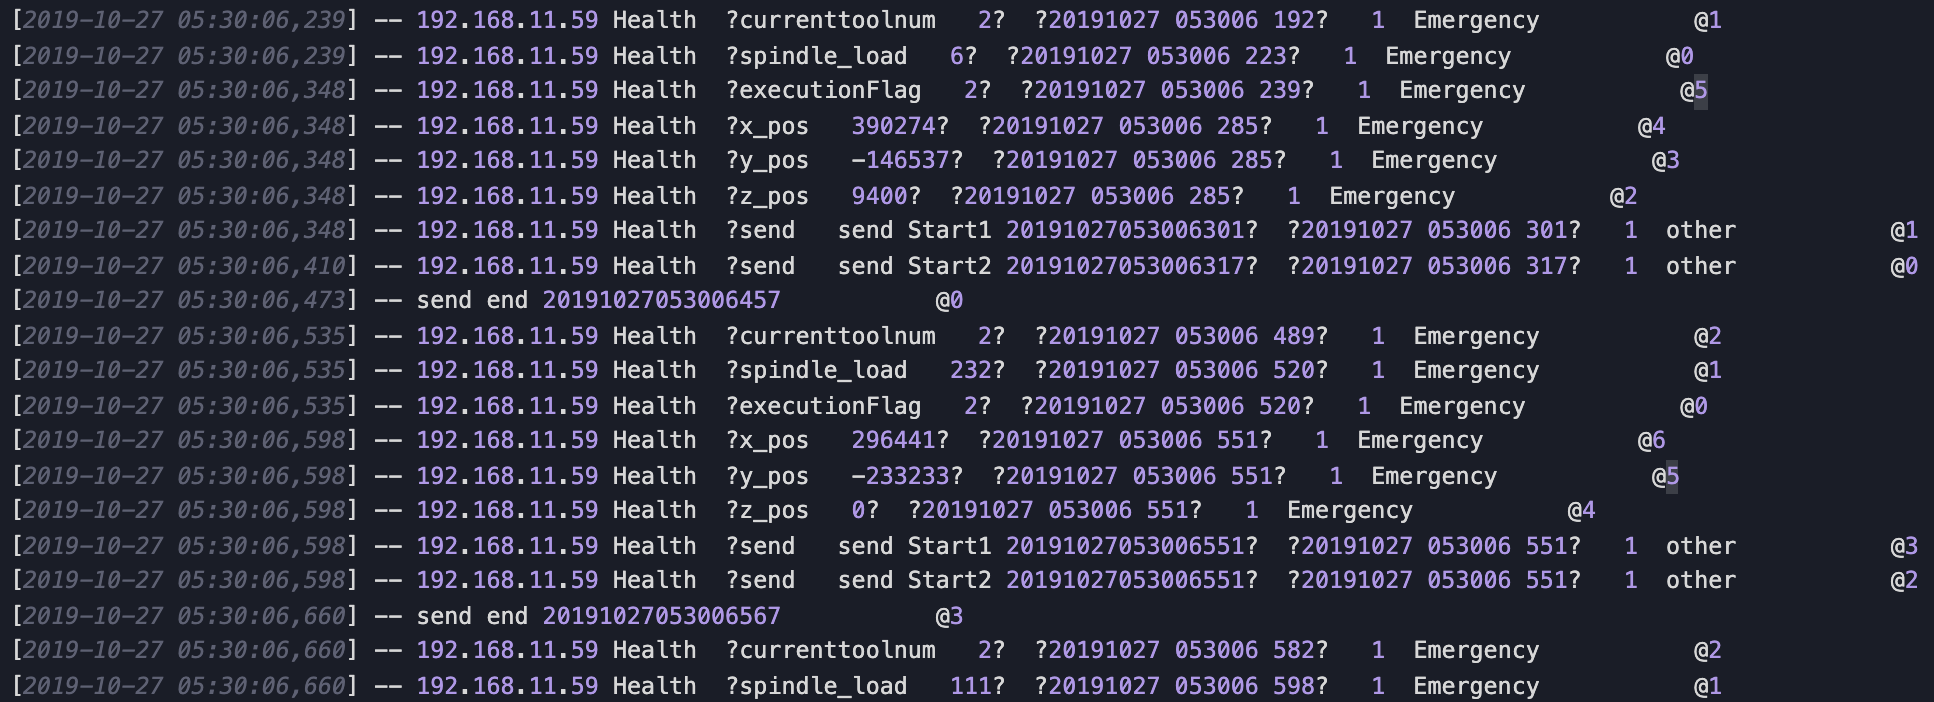

We're going to do some processing with this file, the desire output will be a CSV file that looks like:

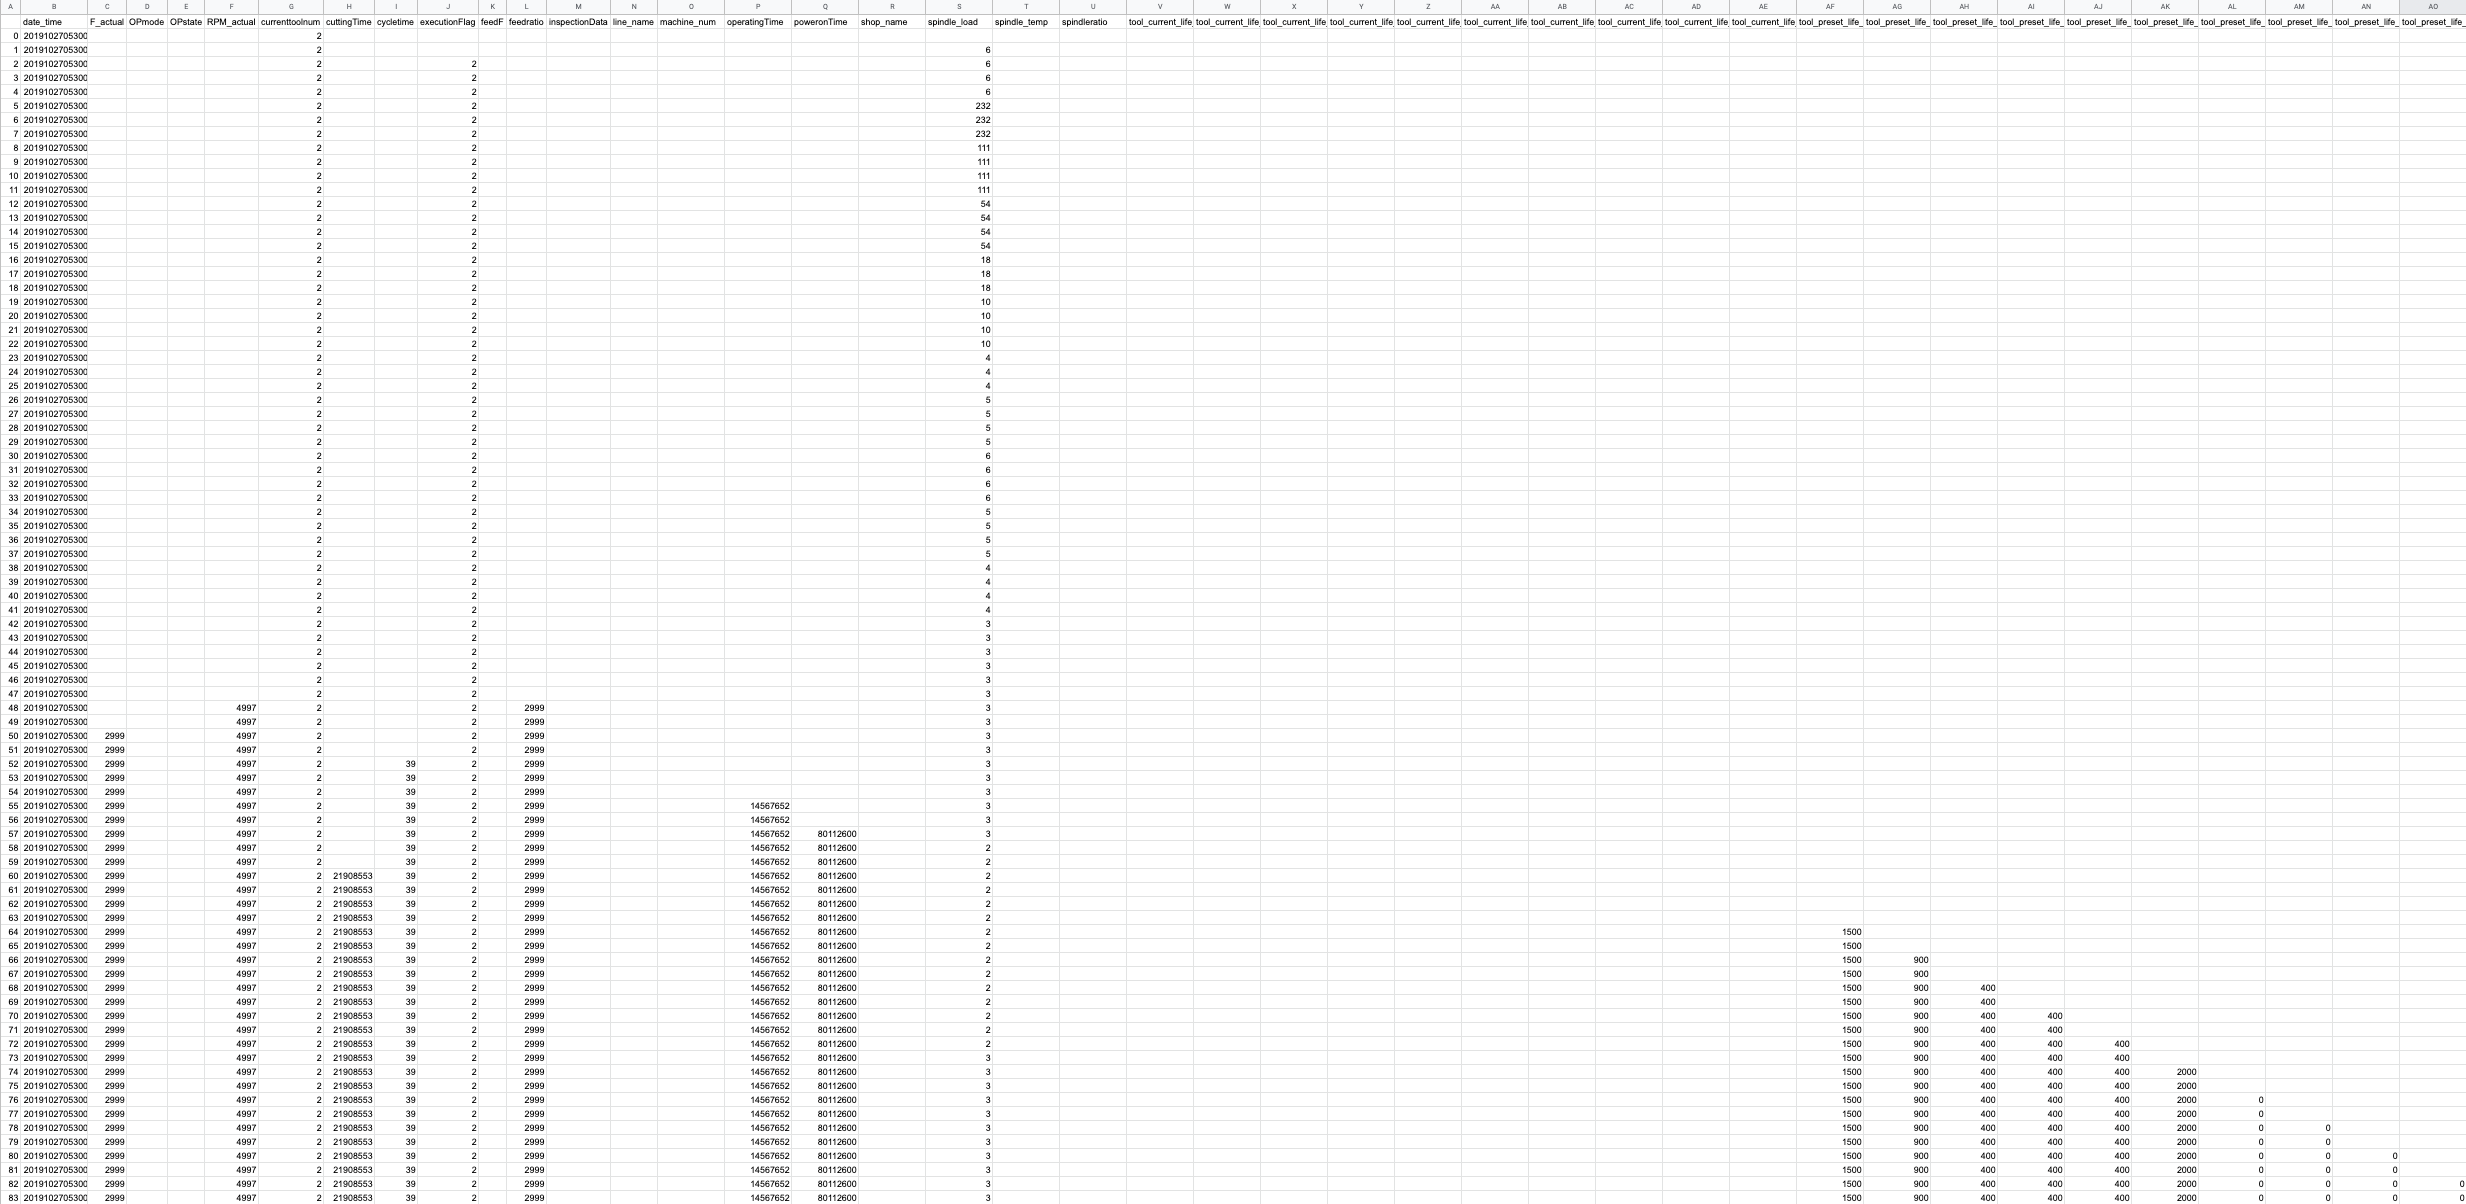

In [ ]:
import pandas as pd
import numpy as np

# Import the file into dataframe
raw_df = pd.read_table(
    "data/cnc_logs/20191027.log", 
    chunksize = 1000, 
    header = None
)

In [2]:
for dataset in raw_df:
    print(dataset)

                                                     0
0    [2019-10-27 05:30:06,239] -- 192.168.11.59 Hea...
1    [2019-10-27 05:30:06,239] -- 192.168.11.59 Hea...
2    [2019-10-27 05:30:06,348] -- 192.168.11.59 Hea...
3    [2019-10-27 05:30:06,348] -- 192.168.11.59 Hea...
4    [2019-10-27 05:30:06,348] -- 192.168.11.59 Hea...
..                                                 ...
995  [2019-10-27 05:30:21,989] -- 192.168.11.59 Hea...
996  [2019-10-27 05:30:21,989] -- send end 20191027...
997  [2019-10-27 05:30:21,989] -- 192.168.11.59 Hea...
998  [2019-10-27 05:30:21,989] -- 192.168.11.59 Hea...
999  [2019-10-27 05:30:22,051] -- 192.168.11.59 Hea...

[1000 rows x 1 columns]


In [3]:
# Convert the dataset into a list
dataset_list = list(dataset[0])
print(dataset_list)

['[2019-10-27 05:30:06,239] -- 192.168.11.59 Health  ?currenttoolnum   2?  ?20191027 053006 192?   1  Emergency           @1', '[2019-10-27 05:30:06,239] -- 192.168.11.59 Health  ?spindle_load   6?  ?20191027 053006 223?   1  Emergency           @0', '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?executionFlag   2?  ?20191027 053006 239?   1  Emergency           @5', '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?x_pos   390274?  ?20191027 053006 285?   1  Emergency           @4', '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?y_pos   -146537?  ?20191027 053006 285?   1  Emergency           @3', '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?z_pos   9400?  ?20191027 053006 285?   1  Emergency           @2', '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?send   send Start1 20191027053006301?  ?20191027 053006 301?   1  other           @1', '[2019-10-27 05:30:06,410] -- 192.168.11.59 Health  ?send   send Start2 20191027053006317?  ?20191027 053006 317?   1  

In [4]:
# Split the line by space, and we only need the first 14 columns of the data.
line_split = [line.split(' ')[:14] for line in dataset_list]
long_df = pd.DataFrame(line_split)
print(long_df)

              0              1   2              3       4                  5   \
0    [2019-10-27  05:30:06,239]  --  192.168.11.59  Health                      
1    [2019-10-27  05:30:06,239]  --  192.168.11.59  Health                      
2    [2019-10-27  05:30:06,348]  --  192.168.11.59  Health                      
3    [2019-10-27  05:30:06,348]  --  192.168.11.59  Health                      
4    [2019-10-27  05:30:06,348]  --  192.168.11.59  Health                      
..           ...            ...  ..            ...     ...                ...   
995  [2019-10-27  05:30:21,989]  --  192.168.11.59  Health                      
996  [2019-10-27  05:30:21,989]  --           send     end  20191027053021817   
997  [2019-10-27  05:30:21,989]  --  192.168.11.59  Health                      
998  [2019-10-27  05:30:21,989]  --  192.168.11.59  Health                      
999  [2019-10-27  05:30:22,051]  --  192.168.11.59  Health                      

                  6  7  8  

In [5]:
# Remove question marks 
long_df[6] = list(map(lambda s: s.replace('?', ''), long_df[6]))
long_df[9] = list(map(lambda s: s.replace('?', ''), long_df[9]))
long_df[11] = list(map(lambda s: s.replace('?', ''), long_df[11]))
long_df[13] = list(map(lambda s: s.replace('?', ''), long_df[13]))
print(long_df)

              0              1   2              3       4                  5   \
0    [2019-10-27  05:30:06,239]  --  192.168.11.59  Health                      
1    [2019-10-27  05:30:06,239]  --  192.168.11.59  Health                      
2    [2019-10-27  05:30:06,348]  --  192.168.11.59  Health                      
3    [2019-10-27  05:30:06,348]  --  192.168.11.59  Health                      
4    [2019-10-27  05:30:06,348]  --  192.168.11.59  Health                      
..           ...            ...  ..            ...     ...                ...   
995  [2019-10-27  05:30:21,989]  --  192.168.11.59  Health                      
996  [2019-10-27  05:30:21,989]  --           send     end  20191027053021817   
997  [2019-10-27  05:30:21,989]  --  192.168.11.59  Health                      
998  [2019-10-27  05:30:21,989]  --  192.168.11.59  Health                      
999  [2019-10-27  05:30:22,051]  --  192.168.11.59  Health                      

                 6  7  8   

In [6]:
# Get the columns we need
long_df = long_df.loc[:, [6, 9, 11, 12, 13]]
print(long_df)

                 6        9                  11      12        13
0    currenttoolnum        2           20191027  053006       192
1      spindle_load        6           20191027  053006       223
2     executionFlag        2           20191027  053006       239
3             x_pos   390274           20191027  053006       285
4             y_pos  -146537           20191027  053006       285
..              ...      ...                ...     ...       ...
995            send     send  20191027053021801          20191027
996                                                              
997  currenttoolnum        3           20191027  053021       848
998    spindle_load        2           20191027  053021       864
999   executionFlag        2           20191027  053021       895

[1000 rows x 5 columns]


In [7]:
# Take all the observations from column '6' as our dataframe columns
all_columns = list(set(long_df[6].tolist()))
print(all_columns)

['', 'tool_current_life_03', 'feedratio', 'x_pos', 'tool_preset_life_02', 'cycletime', 'tool_preset_life_12', 'tool_current_life_05', 'tool_preset_life_11', 'currenttoolnum', 'tool_preset_life_05', 'tool_current_life_01', 'spindle_temp', 'tool_current_life_02', 'tool_current_life_04', 'line_name', 'operatingTime', 'spindle_load', 'tool_current_life_15', 'z_pos', 'OPmode', 'feedF', 'machine_num', 'workcount', 'RPM_actual', 'tool_preset_life_03', 'tool_preset_life_04', 'inspectionData', 'cuttingTime', 'tool_preset_life_13', 'tool_current_life_13', 'OPstate', 'send', 'tool_preset_life_01', 'y_pos', 'spindleratio', 'executionFlag', 'poweronTime', 'shop_name', 'F_actual', 'tool_preset_life_14', 'tool_current_life_11', 'tool_current_life_14', 'tool_preset_life_15', 'tool_current_life_12']


In [8]:
# Remove the data we don't need 
all_columns.remove('')
all_columns.remove('send')
all_columns.sort()
print(all_columns)

['F_actual', 'OPmode', 'OPstate', 'RPM_actual', 'currenttoolnum', 'cuttingTime', 'cycletime', 'executionFlag', 'feedF', 'feedratio', 'inspectionData', 'line_name', 'machine_num', 'operatingTime', 'poweronTime', 'shop_name', 'spindle_load', 'spindle_temp', 'spindleratio', 'tool_current_life_01', 'tool_current_life_02', 'tool_current_life_03', 'tool_current_life_04', 'tool_current_life_05', 'tool_current_life_11', 'tool_current_life_12', 'tool_current_life_13', 'tool_current_life_14', 'tool_current_life_15', 'tool_preset_life_01', 'tool_preset_life_02', 'tool_preset_life_03', 'tool_preset_life_04', 'tool_preset_life_05', 'tool_preset_life_11', 'tool_preset_life_12', 'tool_preset_life_13', 'tool_preset_life_14', 'tool_preset_life_15', 'workcount', 'x_pos', 'y_pos', 'z_pos']


In [9]:
# Reshape long_df from long to wide format and assign groups with timestamp to df
column_count = len(all_columns)
pre_time = ''
record = []
records_list = []

for line in dataset_list:
    str_list = line.split(' ')
    if str_list[6] != '' and str_list[6][0] == '?' and str_list[11][0] == '?':
        request = str_list[6][1:]
        if request in all_columns:
            date = str_list[11][1:5] + str_list[11][5:7] + str_list[11][7:]
            time = str_list[12][0:2] + str_list[12][2:4] + str_list[12][4:]
            millisec = str_list[13][:-1]
            cur_time = date + time + '.' + millisec
            response = str_list[9].replace('?', '')
            if cur_time != pre_time:
                if record != []:
                    records_list.append(record)
                record = [cur_time] + ['' for i in range(column_count)]
                pre_time = cur_time
            record[all_columns.index(request) + 1] = response
records_list.append(record)

df = pd.DataFrame(records_list, columns=['date_time'] + all_columns)
print(df)

              date_time F_actual OPmode OPstate RPM_actual currenttoolnum  \
0    20191027053006.192                                                 2   
1    20191027053006.223                                                     
2    20191027053006.239                                                     
3    20191027053006.285                                                     
4    20191027053006.489                                                 2   
..                  ...      ...    ...     ...        ...            ...   
514  20191027053021.770                                                     
515  20191027053021.801                                                     
516  20191027053021.848                                                 3   
517  20191027053021.864                                                     
518  20191027053021.895                                                     

    cuttingTime cycletime executionFlag feedF  ... tool_preset_life_05  \
0

In [10]:
# Convert argument to a numeric type. (The default return dtype is float64 or int64 depending on the data supplied)
df[all_columns] = df[all_columns].apply(pd.to_numeric, errors='ignore')

# Reset index (optional)
df = df.reset_index(drop=True)

# Replace empty values with Pandas NAN
df = df.replace('', np.nan)
print(df)

# Export to CSV
df.to_csv('output/df.csv')

              date_time  F_actual  OPmode  OPstate  RPM_actual  \
0    20191027053006.192       NaN     NaN      NaN         NaN   
1    20191027053006.223       NaN     NaN      NaN         NaN   
2    20191027053006.239       NaN     NaN      NaN         NaN   
3    20191027053006.285       NaN     NaN      NaN         NaN   
4    20191027053006.489       NaN     NaN      NaN         NaN   
..                  ...       ...     ...      ...         ...   
514  20191027053021.770       NaN     NaN      NaN         NaN   
515  20191027053021.801       NaN     NaN      NaN         NaN   
516  20191027053021.848       NaN     NaN      NaN         NaN   
517  20191027053021.864       NaN     NaN      NaN         NaN   
518  20191027053021.895       NaN     NaN      NaN         NaN   

     currenttoolnum  cuttingTime  cycletime  executionFlag  feedF  ...  \
0               2.0          NaN        NaN            NaN    NaN  ...   
1               NaN          NaN        NaN            NaN 

In [11]:
# Fill up missing values
df = df.ffill()
print(df)

# Export to CSV
df.to_csv('output/df_new.csv')

              date_time  F_actual  OPmode  OPstate  RPM_actual  \
0    20191027053006.192       NaN     NaN      NaN         NaN   
1    20191027053006.223       NaN     NaN      NaN         NaN   
2    20191027053006.239       NaN     NaN      NaN         NaN   
3    20191027053006.285       NaN     NaN      NaN         NaN   
4    20191027053006.489       NaN     NaN      NaN         NaN   
..                  ...       ...     ...      ...         ...   
514  20191027053021.770    6857.0     NaN      2.0       176.0   
515  20191027053021.801    6857.0     NaN      2.0       176.0   
516  20191027053021.848    6857.0     NaN      2.0       176.0   
517  20191027053021.864    6857.0     NaN      2.0       176.0   
518  20191027053021.895    6857.0     NaN      2.0       176.0   

     currenttoolnum  cuttingTime  cycletime  executionFlag  feedF  ...  \
0               2.0          NaN        NaN            NaN    NaN  ...   
1               2.0          NaN        NaN            NaN 